In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pickle, os

In [ ]:
# -------------------------------
# Load Models from Paths
# -------------------------------
model_paths = {
    "Custom_CNN": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\cnn_emotion_model.h5",
    "Custom_RNN": r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\rnn_model_full.h5"
}


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing for test data (only rescale, no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test dataset
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\kotaa\Downloads\emotion_recognition_1\emotion_recognition\data\test",
    target_size=(48, 48),   # or (img_height, img_width) if you defined earlier
    color_mode="grayscale", # or "rgb"
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 7178 images belonging to 7 classes.



🔹 Loading Custom_CNN ...
225/225 [==============================] - 8s 34ms/step

📊 Classification Report - Custom_CNN
              precision    recall  f1-score   support

       angry       0.48      0.47      0.48       958
     disgust       0.75      0.05      0.10       111
        fear       0.48      0.13      0.21      1024
       happy       0.74      0.87      0.80      1774
     neutral       0.44      0.73      0.55      1233
         sad       0.47      0.33      0.39      1247
    surprise       0.67      0.76      0.71       831

    accuracy                           0.57      7178
   macro avg       0.58      0.48      0.46      7178
weighted avg       0.56      0.57      0.54      7178



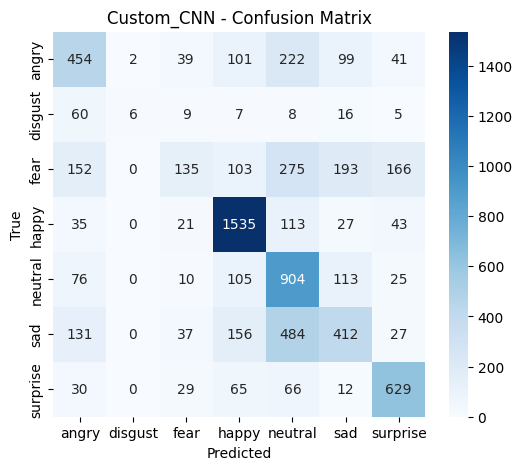


🔹 Loading MobileNetV2 ...
225/225 [==============================] - 9s 36ms/step

📊 Classification Report - MobileNetV2
              precision    recall  f1-score   support

       angry       0.41      0.32      0.36       958
     disgust       0.48      0.22      0.30       111
        fear       0.41      0.16      0.23      1024
       happy       0.55      0.77      0.64      1774
     neutral       0.40      0.43      0.41      1233
         sad       0.35      0.39      0.37      1247
    surprise       0.65      0.61      0.63       831

    accuracy                           0.47      7178
   macro avg       0.46      0.41      0.42      7178
weighted avg       0.46      0.47      0.45      7178



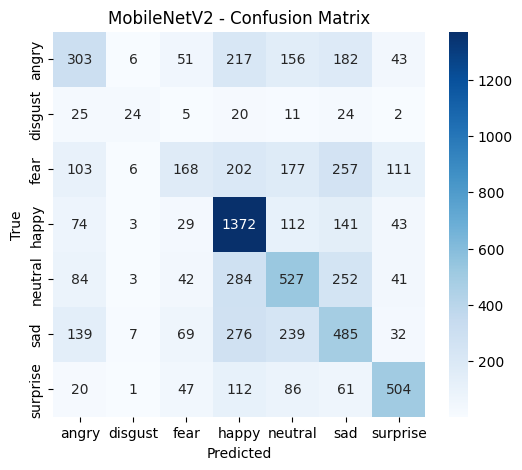

In [7]:
# -------------------------------
# Compare Models
# -------------------------------
results = {}
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

for name, path in model_paths.items():
    print(f"\n🔹 Loading {name} ...")
    model = tf.keras.models.load_model(path)

    # Evaluate on test data
    loss, acc = model.evaluate(test_generator, verbose=0)
    results[name] = {"loss": loss, "accuracy": acc}

    # Predictions
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Classification Report
    print(f"\n📊 Classification Report - {name}")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# -------------------------------
# Accuracy & Loss Comparison
# -------------------------------
names = list(results.keys())
accs = [results[n]["accuracy"] for n in names]
losses = [results[n]["loss"] for n in names]

plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0, 0.5, 'Accuracy')

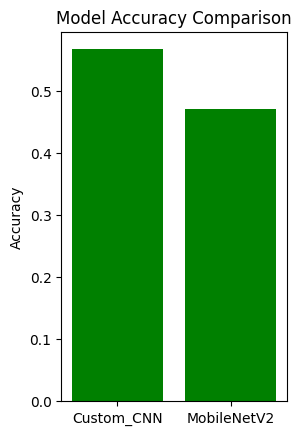

In [9]:
# Accuracy
plt.subplot(1,2,1)
plt.bar(names, accs, color="green")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")


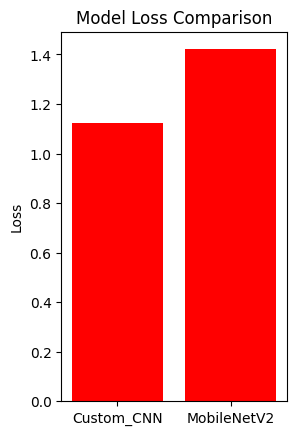

In [10]:
# Loss
plt.subplot(1,2,2)
plt.bar(names, losses, color="red")
plt.title("Model Loss Comparison")
plt.ylabel("Loss")

plt.show()